In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib

In [5]:
df = pd.read_csv('data_sensor.csv')
df['created_at'] = pd.to_datetime(df['created_at'])

## Indoor air quality analysis

In [43]:
def data_iaq_analysis(df):

    ###############
    ###IAQ FIELD###
    ###############

    iaq_field='field5'
    #plot according to fluctuations
    inferior_fluctuation_mask = (df[iaq_field] <= df[iaq_field].quantile(0.25))
    superior_fluctuation_mask = (df[iaq_field] >= df[iaq_field].quantile(0.75))
    mean_fluctuation_mask = (df[iaq_field] > df[iaq_field].quantile(0.25)) & (df[iaq_field] < df[iaq_field].quantile(0.75))
    
    mean_values = df[mean_fluctuation_mask]
    superior_values = df[superior_fluctuation_mask]
    inferior_values = df[inferior_fluctuation_mask]
    
    ###Not very necessary for now, iaq always bewteen 200 and 250
    #index values of indoor air quality
    #excellent_index_mask = (df[iaq_field] < 50)
    #good_index_mask = (df[iaq_field] >= 50) & (df[iaq_field] < 100)
    #little_index_mask = (df[iaq_field] >= 100) & (df[iaq_field] < 150)
    #moderate_index_mask = (df[iaq_field] >= 150) & (df[iaq_field] < 200)
    #unhealthy_index_mask = (df[iaq_field] >= 200) & (df[iaq_field] <= 250)
    #very_unhealthy_index_mask = (df[iaq_field] > 250)
    
    
    plt.figure(figsize=(15,4))
    
    plt.scatter(inferior_values['created_at'], inferior_values[iaq_field], c="green")
    plt.scatter(mean_values['created_at'], mean_values[iaq_field], c='orange')
    plt.scatter(superior_values['created_at'], superior_values[iaq_field], c='red')
    plt.plot(df['created_at'], df[iaq_field])
    
    plt.show()

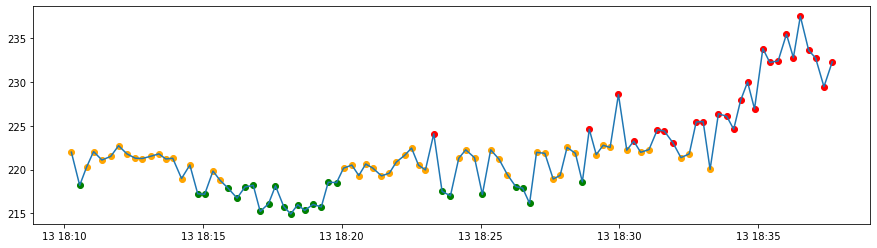

In [44]:
data_iaq_analysis(df)

## Temperature and humidity analysis by using the humidex indice

In [8]:
def humidex(row):
    humidity_field = "field2"
    temperature_field = "field1"
    return row[temperature_field] + 5/9*(6.112*10**(7.5*row[temperature_field]/(237.7+row[temperature_field]))*row[humidity_field]/100-10)

In [45]:
def data_humidex_analysis(df):
    humidity_field = "field2"
    temperature_field = "field1"
    df['humidex'] = df.apply (lambda row: humidex(row), axis=1)
    
    no_discomfort = df[(df['humidex'] < 29)]
    some_disconfort = df[(df['humidex'] >= 30) & (df['humidex'] < 40)]
    great_disconfort = df[(df['humidex'] >= 40)]
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(311)
    plt.scatter(no_discomfort['created_at'], no_discomfort['humidex'], c="green")
    plt.scatter(some_disconfort['created_at'], some_disconfort['humidex'], c='orange')
    plt.scatter(great_disconfort['created_at'], great_disconfort['humidex'], c='red')
    plt.plot(df['created_at'], df['humidex'])
    
    plt.subplot(312)
    plt.plot(df['created_at'], df[humidity_field])
    
    plt.subplot(313)
    plt.plot(df['created_at'], df[temperature_field])
    
    plt.show()
    

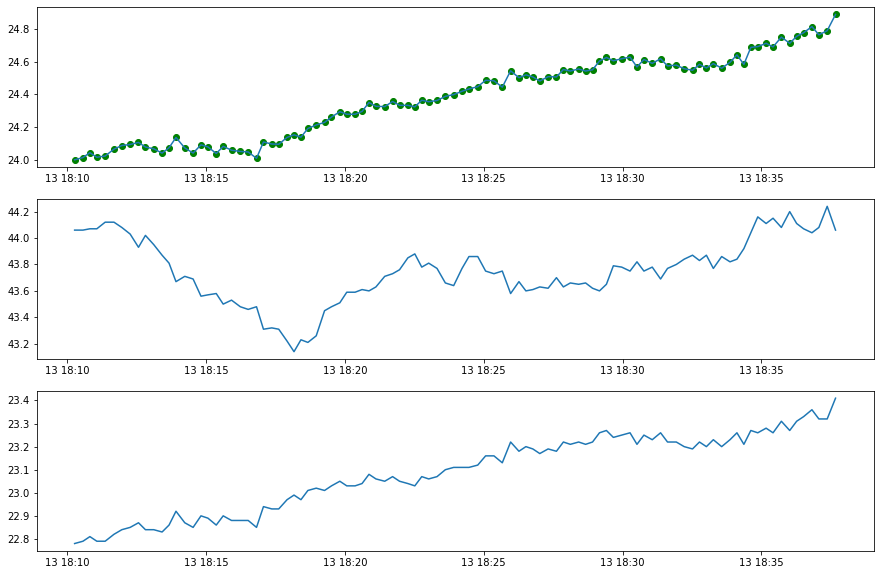

In [46]:
data_humidex_analysis(df)

In [ ]:
df.head()